<a href="https://colab.research.google.com/github/raihanazhar05/Bikerental-data/blob/main/Submission_Belajar_Analisis_Data_dengan_Python_Raihan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Raihan Azhar Lapandu
- **Email:** raihanazhar05@gmail.com
- **ID Dicoding:** rayray_17

## Menentukan Pertanyaan Bisnis

- Bagaimana kondisi cuaca mempengaruhi jumlah penyewaan sepeda?
Pertanyaan ini bertujuan untuk mengeksplorasi hubungan antara berbagai kondisi cuaca (seperti suhu, kelembaban, dan kecepatan angin) dengan jumlah penyewaan sepeda. Memahami hubungan ini dapat membantu dalam memprediksi permintaan berdasarkan perkiraan cuaca.

- Kapan jam dan hari puncak untuk penyewaan sepeda?
Pertanyaan ini fokus pada identifikasi periode waktu (baik secara jam maupun harian) dengan aktivitas penyewaan sepeda tertinggi. Informasi ini berguna untuk alokasi sumber daya, seperti memastikan ketersediaan sepeda yang cukup selama periode permintaan tinggi.

## Import Semua Packages/Library yang Digunakan

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [21]:
# Load dataset
day_df = pd.read_csv('https://raw.githubusercontent.com/raihanazhar05/Bikerental-data/main/dataset/day.csv')
hour_df = pd.read_csv('https://raw.githubusercontent.com/raihanazhar05/Bikerental-data/main/dataset/hour.csv')

# Menampilkan beberapa data dari dataframe
print("5 baris pertama dari day_df:")
print(day_df.head())
print("\n5 baris pertama dari hour_df:")
print(hour_df.head())

5 baris pertama dari day_df:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

### Assessing Data

In [22]:
# Informasi data
print("\nDay DataFrame Info:")
day_df.info()
print("\nHour DataFrame Info:")
hour_df.info()

# Mencari missing value
print("\nMissing Value di day_df:")
print(day_df.isna().sum())
print("\nMissing Value di hour_df:")
print(hour_df.isna().sum())

# Mencari data duplikat
print("\nDuplikat di day_df: ", day_df.duplicated().sum())
print("Duplikat di hour_df: ", hour_df.duplicated().sum())

# Tidak ada data yang missing dan duplikat

# Menampilkan deskripsi statistik pada data
print("\nDescriptive Statistics untuk day_df:")
print(day_df.describe())
print("\nDescriptive Statistics untuk hour_df:")
print(hour_df.describe())


Day DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Hour DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

### Cleaning Data

In [23]:
# Mengubah kolom datetime menjadi objek datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Mengekstrak fitur tambahan dari datetime
hour_df['hour'] = hour_df['dteday'].dt.hour
hour_df['day'] = hour_df['dteday'].dt.dayofweek  # 0 = Monday, 6 = Sunday
hour_df['month'] = hour_df['dteday'].dt.month
hour_df['year'] = hour_df['dteday'].dt.year

day_df['day'] = day_df['dteday'].dt.dayofweek  # 0 = Monday, 6 = Sunday
day_df['month'] = day_df['dteday'].dt.month
day_df['year'] = day_df['dteday'].dt.year

# Menyimpan data yang telah dibersihkan untuk analisis lebih lanjut
day_df.to_csv('/content/cleaned_day_data.csv', index=False)
hour_df.to_csv('/content/cleaned_hour_data.csv', index=False)

# Memuat data yang telah dibersihkan
day_df = pd.read_csv('/content/cleaned_day_data.csv')
hour_df = pd.read_csv('/content/cleaned_hour_data.csv')

## Exploratory Data Analysis (EDA)

### Distribusi Data

day_df Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
 16  day         731 non-null    int64  
 17  month       731 non-null    int64  
 18  year        731 non-null    int64  
dtypes: float64(4), i

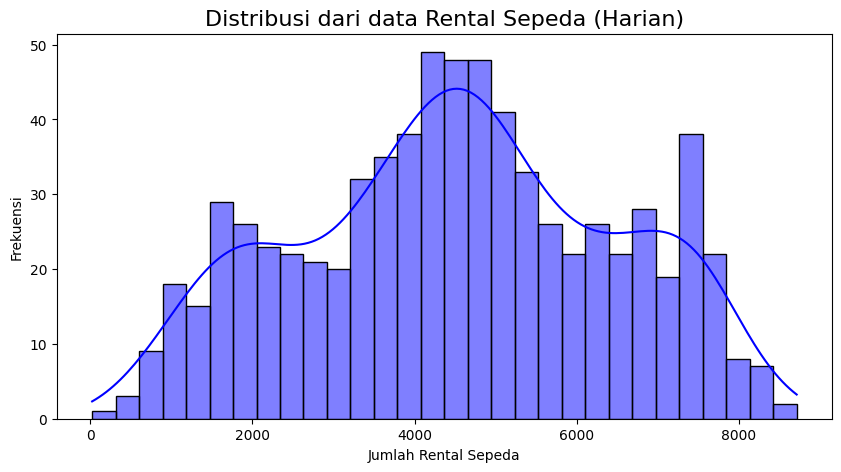

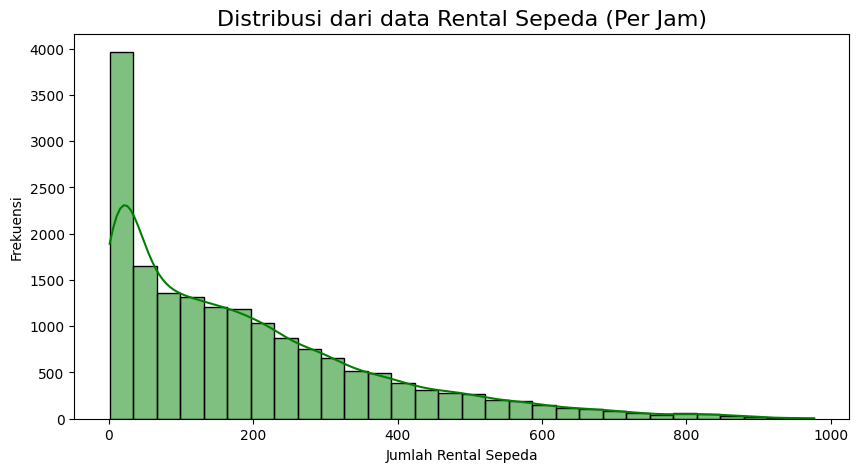

In [24]:
# Memeriksa data yang telah dibersihkan pada langkah sebelumnya
print("day_df Info:")
print(day_df.info())
print("\n5 baris pertama pada day_df:")
print(day_df.head())

print("\nhour_df Info:")
print(hour_df.info())
print("\n5 baris pertama pada hour_df:")
print(hour_df.head())

# Rangkuman dari statistik yang ada pada day_df dan hour_df
print("\nRangkuman statistik untuk day_df:")
print(day_df.describe())

print("\nRangkuman statistik untuk hour_df:")
print(hour_df.describe())

# Distribusi Data
plt.figure(figsize=(10, 5))
sns.histplot(day_df['cnt'], bins=30, kde=True, color='blue')
plt.title('Distribusi dari data Rental Sepeda (Harian)', fontsize=16)
plt.xlabel('Jumlah Rental Sepeda')
plt.ylabel('Frekuensi')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(hour_df['cnt'], bins=30, kde=True, color='green')
plt.title('Distribusi dari data Rental Sepeda (Per Jam)', fontsize=16)
plt.xlabel('Jumlah Rental Sepeda')
plt.ylabel('Frekuensi')
plt.show()

### Melihat Outlier Data

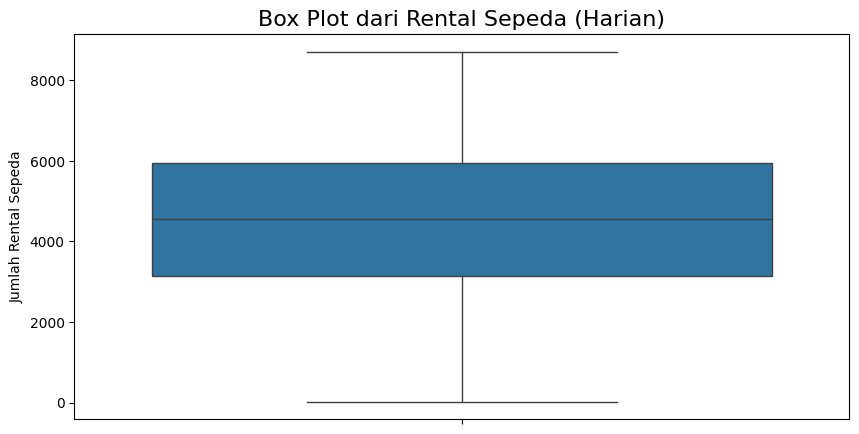

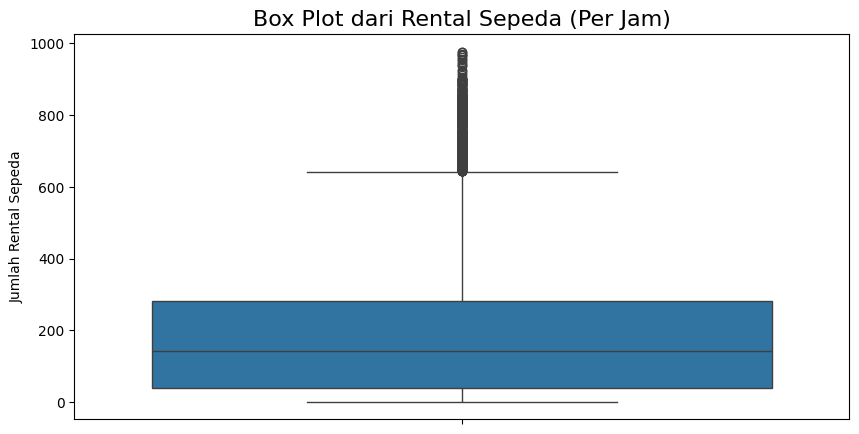

In [25]:
# Data Outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=day_df, y='cnt')
plt.title('Box Plot dari Rental Sepeda (Harian)', fontsize=16)
plt.ylabel('Jumlah Rental Sepeda')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=hour_df, y='cnt')
plt.title('Box Plot dari Rental Sepeda (Per Jam)', fontsize=16)
plt.ylabel('Jumlah Rental Sepeda')
plt.show()

### Hubungan Antar Fitur dan Korelasi Data

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable h

<Figure size 1000x500 with 0 Axes>

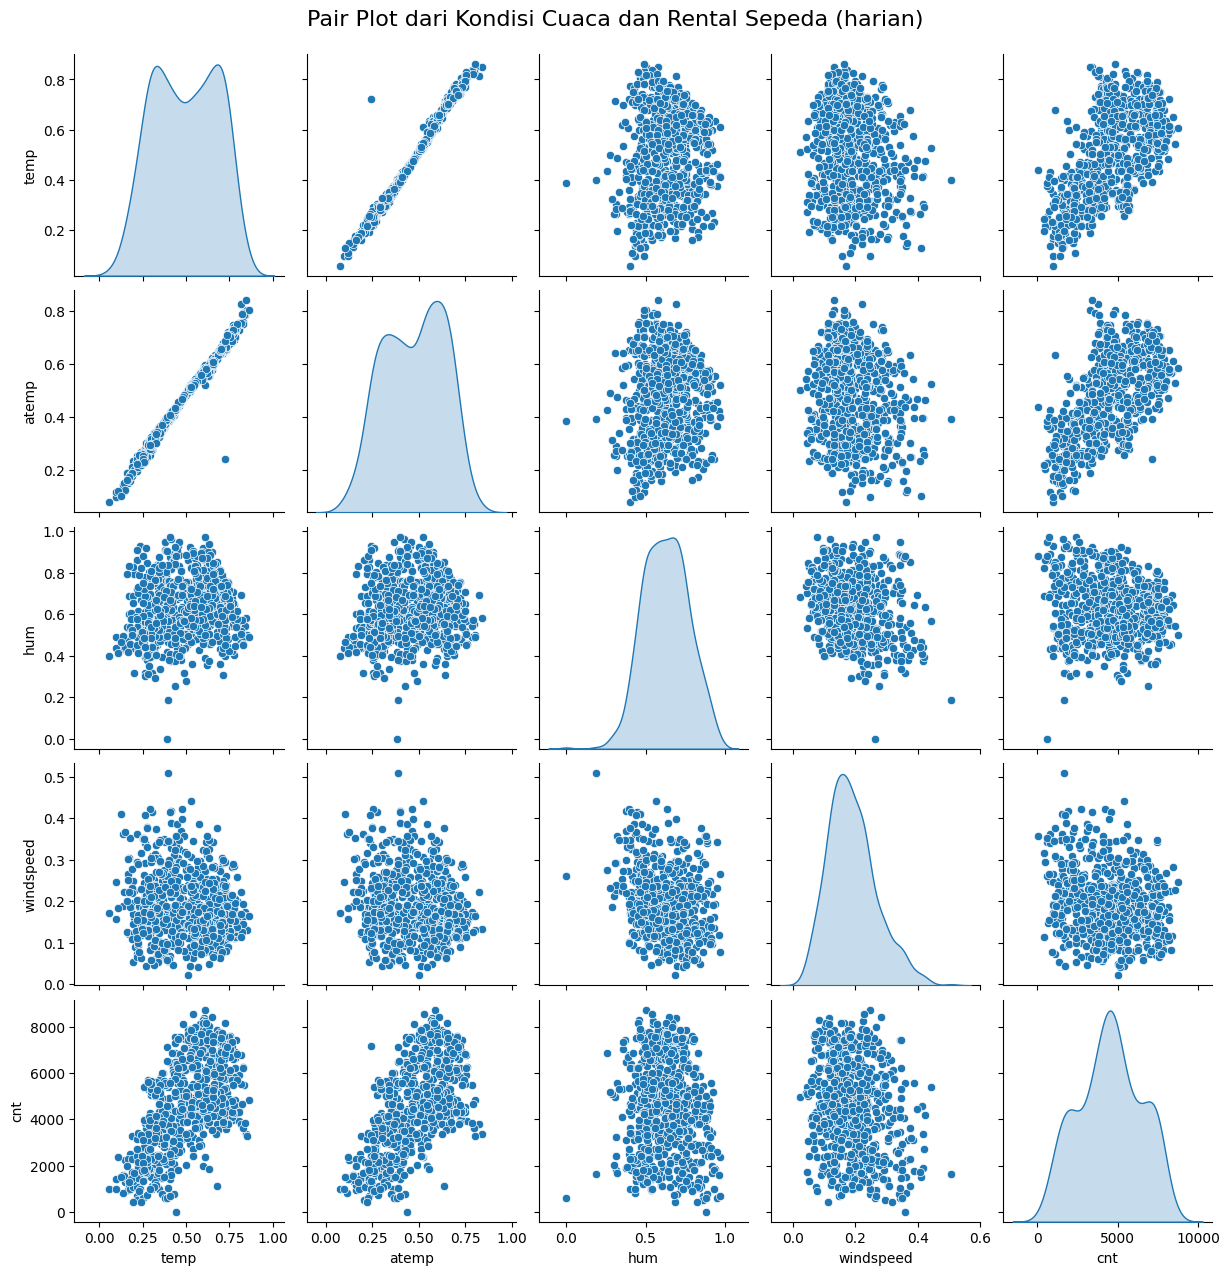

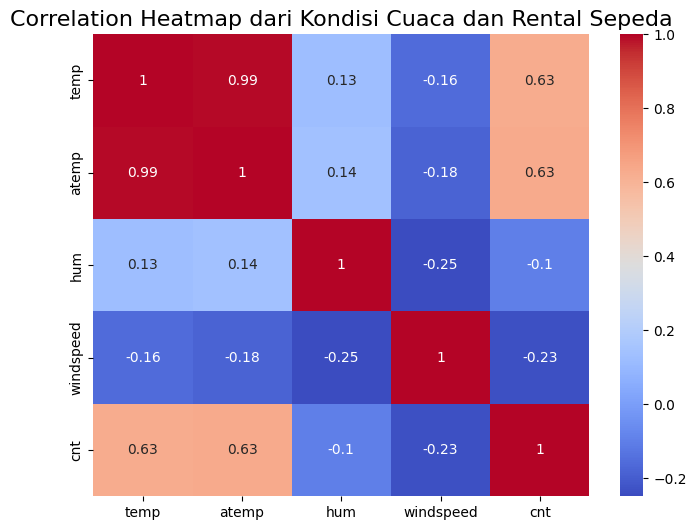

In [26]:
# Hubungan antar fitur
plt.figure(figsize=(10, 5))
sns.pairplot(day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']], diag_kind='kde', palette='coolwarm')
plt.suptitle('Pair Plot dari Kondisi Cuaca dan Rental Sepeda (harian)', y=1.02, fontsize=16)
plt.show()

# Heatmap Korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap dari Kondisi Cuaca dan Rental Sepeda', fontsize=16)
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

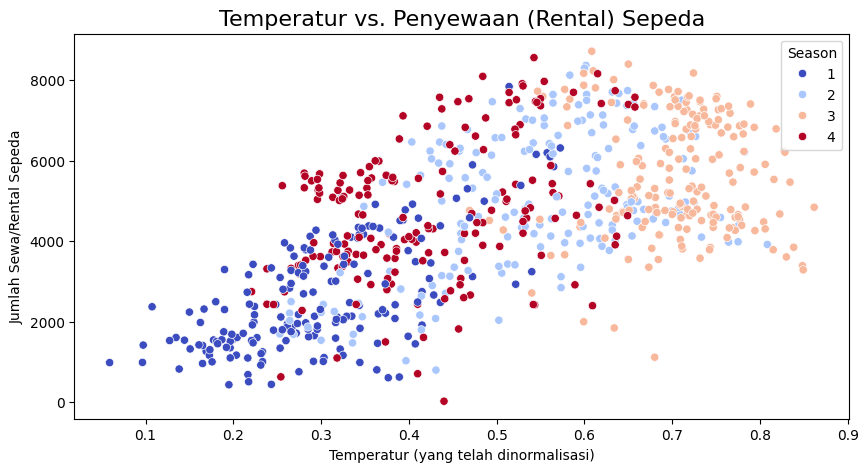

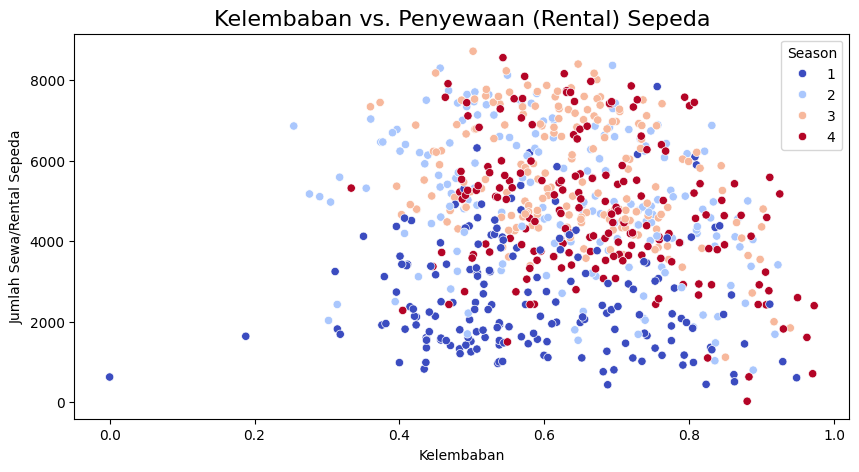

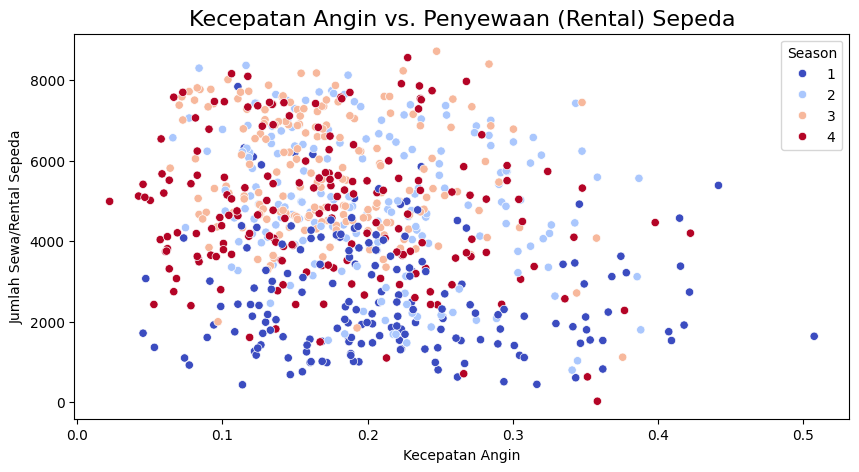

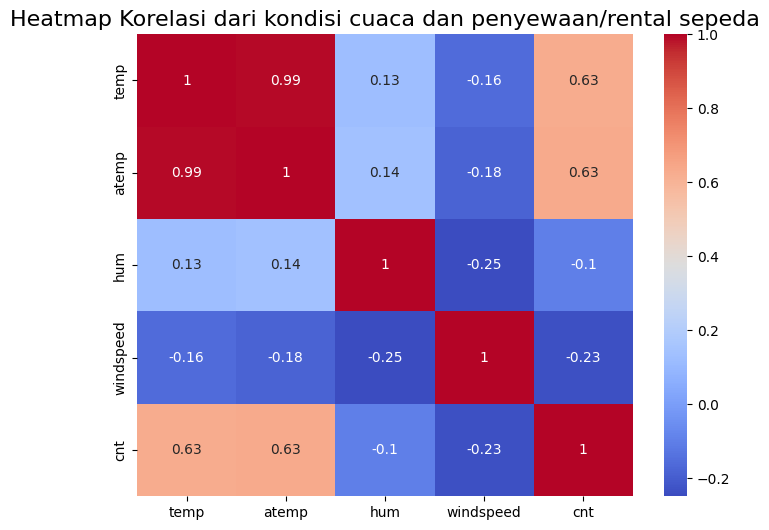

In [27]:
# Temperatur vs. Penyewaan (Rental) Sepeda
plt.figure(figsize=(10, 5))
sns.scatterplot(data=day_df, x='temp', y='cnt', hue='season', palette='coolwarm')
plt.title('Temperatur vs. Penyewaan (Rental) Sepeda', fontsize=16)
plt.xlabel('Temperatur (yang telah dinormalisasi)')
plt.ylabel('Jumlah Sewa/Rental Sepeda')
plt.legend(title='Season')
plt.show()

# Kelembaban vs. Penyewaan (Rental) Sepeda
plt.figure(figsize=(10, 5))
sns.scatterplot(data=day_df, x='hum', y='cnt', hue='season', palette='coolwarm')
plt.title('Kelembaban vs. Penyewaan (Rental) Sepeda', fontsize=16)
plt.xlabel('Kelembaban')
plt.ylabel('Jumlah Sewa/Rental Sepeda')
plt.legend(title='Season')
plt.show()

# Kecepatan Angin vs. Penyewaan (Rental) Sepeda
plt.figure(figsize=(10, 5))
sns.scatterplot(data=day_df, x='windspeed', y='cnt', hue='season', palette='coolwarm')
plt.title('Kecepatan Angin vs. Penyewaan (Rental) Sepeda', fontsize=16)
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Sewa/Rental Sepeda')
plt.legend(title='Season')
plt.show()

# Heatmap Korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi dari kondisi cuaca dan penyewaan/rental sepeda', fontsize=16)
plt.show()

### Pertanyaan 2:

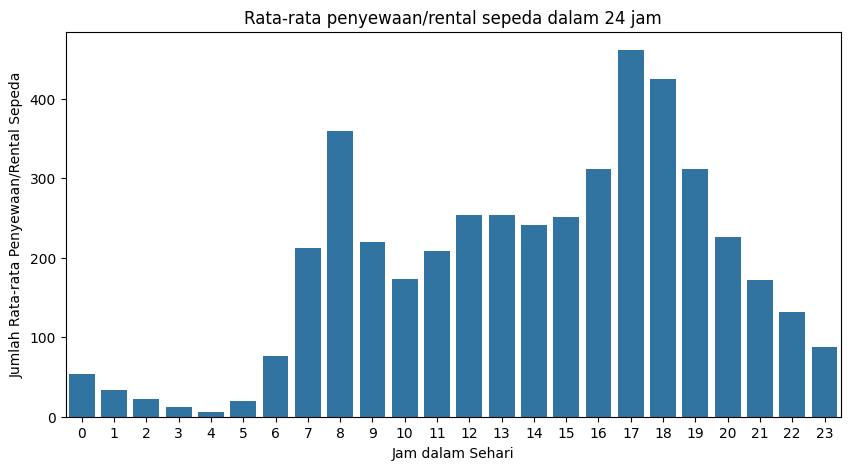

<ipython-input-28-5b982cadbfc8>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily_rentals, x='day', y='cnt', palette='viridis')


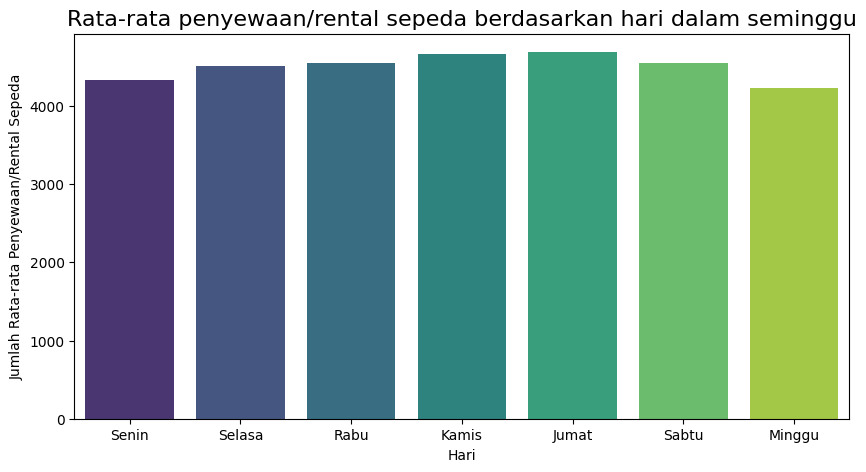

<ipython-input-28-5b982cadbfc8>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_rentals, x='month', y='cnt', palette='viridis')


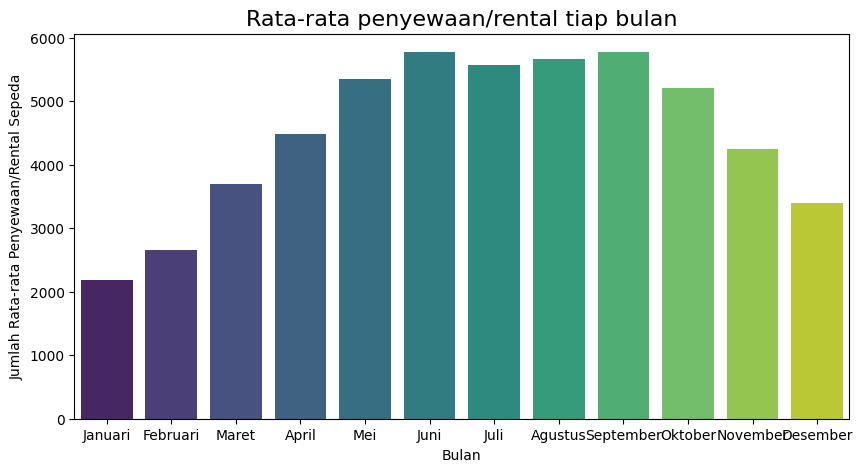

In [28]:
# Memastikan kolom 'hr' ada dalam hour_df
if 'hr' in hour_df.columns:
    hour_df['hour'] = hour_df['hr']
else:
    hour_df['hour'] = pd.to_datetime(hour_df['dteday']).dt.hour

# Rata-rata penyewaan/rental sepeda dalam 24 jam
hourly_rentals = hour_df.groupby('hour')['cnt'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(data=hourly_rentals, x='hour', y='cnt')
plt.title('Rata-rata penyewaan/rental sepeda dalam 24 jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Rata-rata Penyewaan/Rental Sepeda')
plt.show()

# Rata-rata penyewaan/rental sepeda berdasarkan hari dalam seminggu
daily_rentals = day_df.groupby('day')['cnt'].mean().reset_index()
days = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
daily_rentals['day'] = daily_rentals['day'].apply(lambda x: days[x])
plt.figure(figsize=(10, 5))
sns.barplot(data=daily_rentals, x='day', y='cnt', palette='viridis')
plt.title('Rata-rata penyewaan/rental sepeda berdasarkan hari dalam seminggu', fontsize=16)
plt.xlabel('Hari')
plt.ylabel('Jumlah Rata-rata Penyewaan/Rental Sepeda')
plt.show()

# Rata-rata penyewaan/rental tiap bulan
monthly_rentals = day_df.groupby('month')['cnt'].mean().reset_index()
months = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
monthly_rentals['month'] = monthly_rentals['month'].apply(lambda x: months[x-1])
plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_rentals, x='month', y='cnt', palette='viridis')
plt.title('Rata-rata penyewaan/rental tiap bulan', fontsize=16)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Rata-rata Penyewaan/Rental Sepeda')
plt.show()

## Conclusion

- **Pertanyaan 1: Bagaimana kondisi cuaca mempengaruhi jumlah persewaan sepeda?**

1. Suhu:
Terdapat korelasi positif antara suhu dan jumlah penyewaan sepeda. Suhu yang lebih tinggi umumnya diikuti dengan peningkatan penyewaan sepeda. Hal ini diharapkan karena lebih banyak orang cenderung bersepeda dalam cuaca yang lebih hangat.

2. Kelembaban:
Kelembaban memiliki korelasi negatif dengan jumlah persewaan sepeda. Ketika kelembaban meningkat, persewaan sepeda cenderung menurun. Ini mungkin karena tingkat kelembaban yang tinggi dapat membuat bersepeda menjadi tidak nyaman.

3. Kecepatan Angin:
Kecepatan angin memiliki korelasi negatif yang lemah dengan jumlah persewaan sepeda. Kecepatan angin yang lebih tinggi cenderung menghasilkan lebih sedikit penyewaan sepeda, mungkin karena angin kencang dapat membuat bersepeda lebih menantang.

4. Analisis Korelasi:  
Heatmap korelasi menunjukkan bahwa suhu memiliki korelasi positif terkuat dengan penyewaan sepeda di antara fitur-fitur yang terkait cuaca, sedangkan kelembaban dan kecepatan angin memiliki korelasi negatif yang lebih lemah.

- **Pertanyaan 2: Kapan jam dan hari puncak untuk persewaan sepeda?**

1. Jam Puncak:
Persewaan sepeda menunjukkan puncak yang berbeda pada jam-jam tertentu dalam sehari. Ada dua puncak utama: satu di pagi hari (sekitar pukul 8-9 pagi) dan satu lagi di sore hari (sekitar pukul 5-6 sore). Puncak ini berkaitan dengan waktu berangkat dan pulang kerja, menunjukkan bahwa banyak orang menggunakan sepeda untuk berangkat dan pulang kerja.

2. Hari Puncak:
Persewaan sepeda bervariasi berdasarkan hari dalam minggu. Rata-rata persewaan sepeda tertinggi terjadi pada hari kerja, dengan puncak pada hari Jumat. Tren ini menunjukkan bahwa hari kerja lebih populer untuk persewaan sepeda, kemungkinan karena alasan transportasi. Akhir pekan mengalami sedikit penurunan dalam persewaan sepeda, mungkin karena lebih sedikit orang yang bepergian.

3. Penyewaan Sepeda per Bulannya:
Persewaan sepeda juga bervariasi berdasarkan bulan. Bulan-bulan yang lebih hangat (Mei hingga September) melihat rata-rata persewaan sepeda yang lebih tinggi, sementara bulan-bulan yang lebih dingin (November hingga Februari) melihat persewaan sepeda yang lebih rendah. Tren musiman ini sejalan dengan pengamatan bahwa cuaca yang lebih hangat mendorong lebih banyak orang untuk menyewa sepeda.

- **Kesimpulan:**
1. Kondisi Cuaca:
  - Suhu yang hangat mendorong lebih banyak penyewaan sepeda.
  - Kelembaban dan kecepatan angin yang tinggi sedikit mengurangi penyewaan sepeda.

2. Pola Waktu:
  - Jam penyewaan puncak terjadi pada waktu berangkat dan pulang kerja di pagi dan sore hari pada hari kerja.
  - Penyewaan sepeda lebih tinggi selama bulan-bulan yang lebih hangat dan sedikit lebih rendah selama akhir pekan.

Wawasan ini dapat membantu dalam mengoptimalkan operasi penyewaan/rental sepeda, seperti menyesuaikan ketersediaan sepeda selama jam-jam puncak, merencanakan untuk kondisi cuaca, dan mempersiapkan perubahan permintaan musiman.